In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
 
%matplotlib inline

In [2]:
#For Normalization
(X_train1, Y_train1), (X_test1, Y_test1) = mnist.load_data()
print(X_train1.shape, Y_train1.shape)
print(X_test1.shape, Y_test1.shape)

#Without Normalization
(X_train2, Y_train2), (X_test2, Y_test2) = mnist.load_data()
print(X_train2.shape, Y_train2.shape)
print(X_test2.shape, Y_test2.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


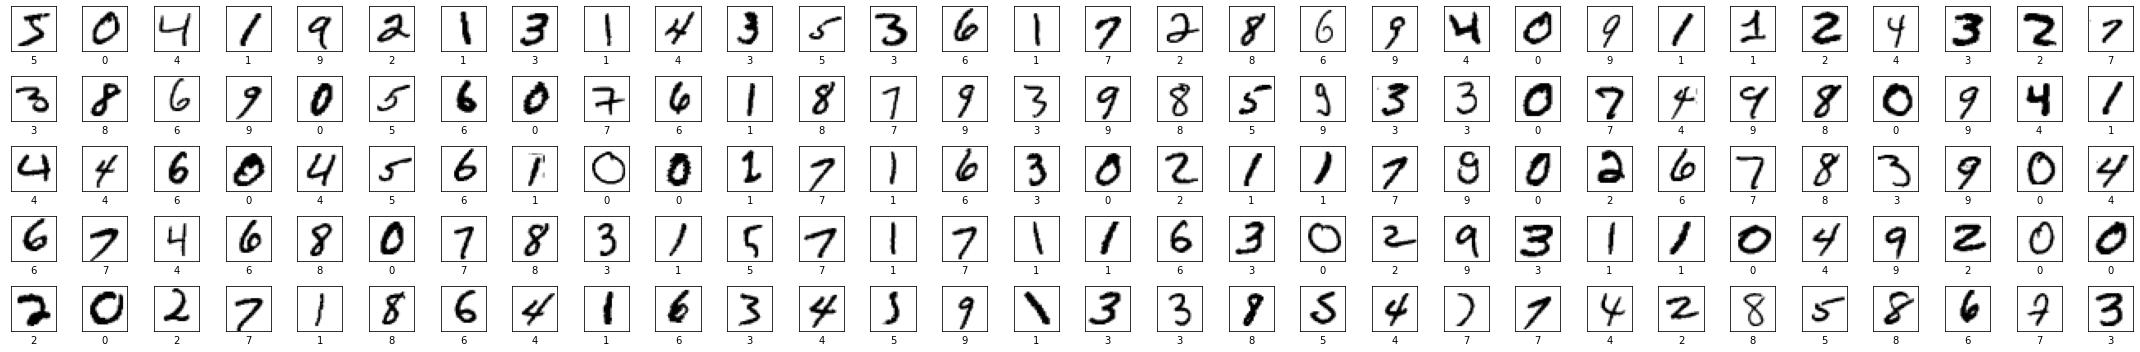

In [3]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train1[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train1[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
# Data Normalization

X_train1, X_test1 = X_train1.reshape(-1, 28,28,1).astype("float32") / 255.0, X_test1.reshape(-1, 28,28,1).astype("float32")  / 255.0

#Without Normalization

X_train2, X_test2 = X_train2.reshape(-1, 28,28,1), X_test2.reshape(-1, 28,28,1)

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [6]:
# Using 'Adam'

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
# Normalize Data

h1 = model.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 6s 3ms/step - loss: 0.2218 - accuracy: 0.9316 - val_loss: 0.0792 - val_accuracy: 0.9769
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0675 - val_accuracy: 0.9795
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0546 - val_accuracy: 0.9824
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0527 - val_accuracy: 0.9857
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0453 - val_accuracy: 0.9863


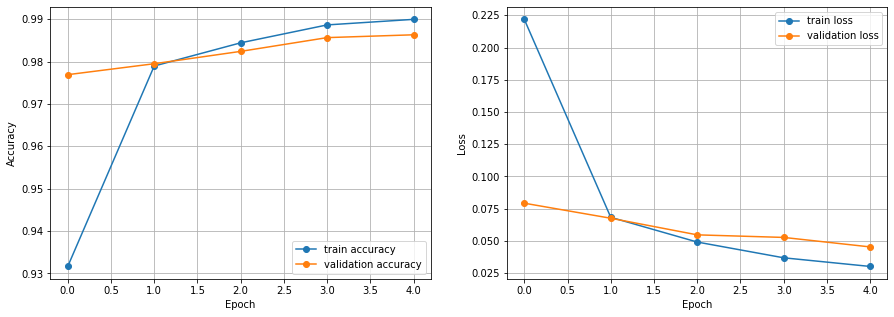

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
# Normalize Data

test_loss1, test_acc1 = model.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9867

Test Accuracy: 0.9866999983787537

Test Loss: 0.04178709164261818


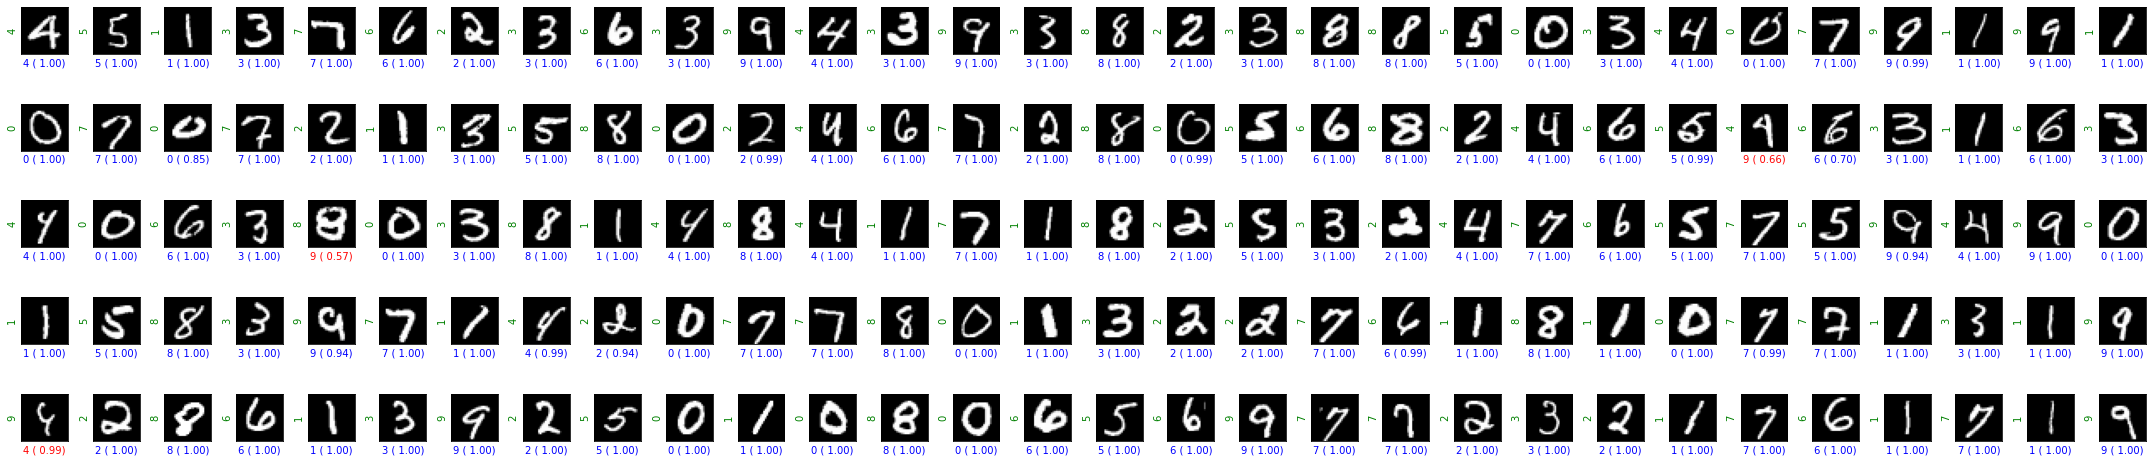

In [10]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [11]:
# Without Normalize Data

h2 = model.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 2.2573 - accuracy: 0.9746 - val_loss: 0.5500 - val_accuracy: 0.9787
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2333 - accuracy: 0.9846 - val_loss: 0.3327 - val_accuracy: 0.9833
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1282 - accuracy: 0.9870 - val_loss: 0.2477 - val_accuracy: 0.9796
Epoch 4/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0996 - accuracy: 0.9864 - val_loss: 0.2495 - val_accuracy: 0.9751
Epoch 5/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0792 - accuracy: 0.9872 - val_loss: 0.1720 - val_accuracy: 0.9788


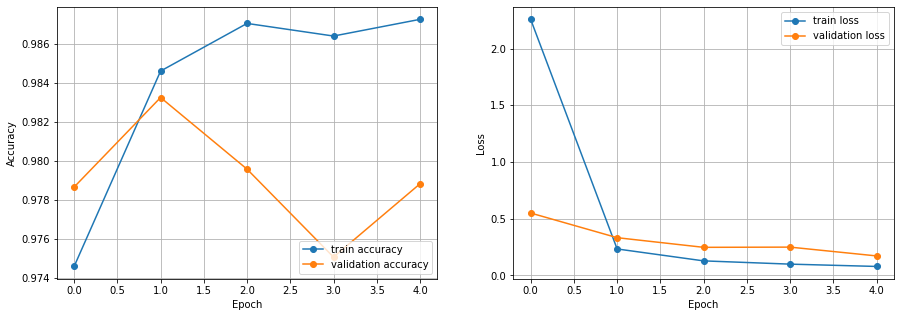

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
# Without Normalize Data

test_loss2, test_acc2 = model.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: 0.1467 - accuracy: 0.9807

Test Accuracy: 0.9807000160217285

Test Loss: 0.1466754525899887


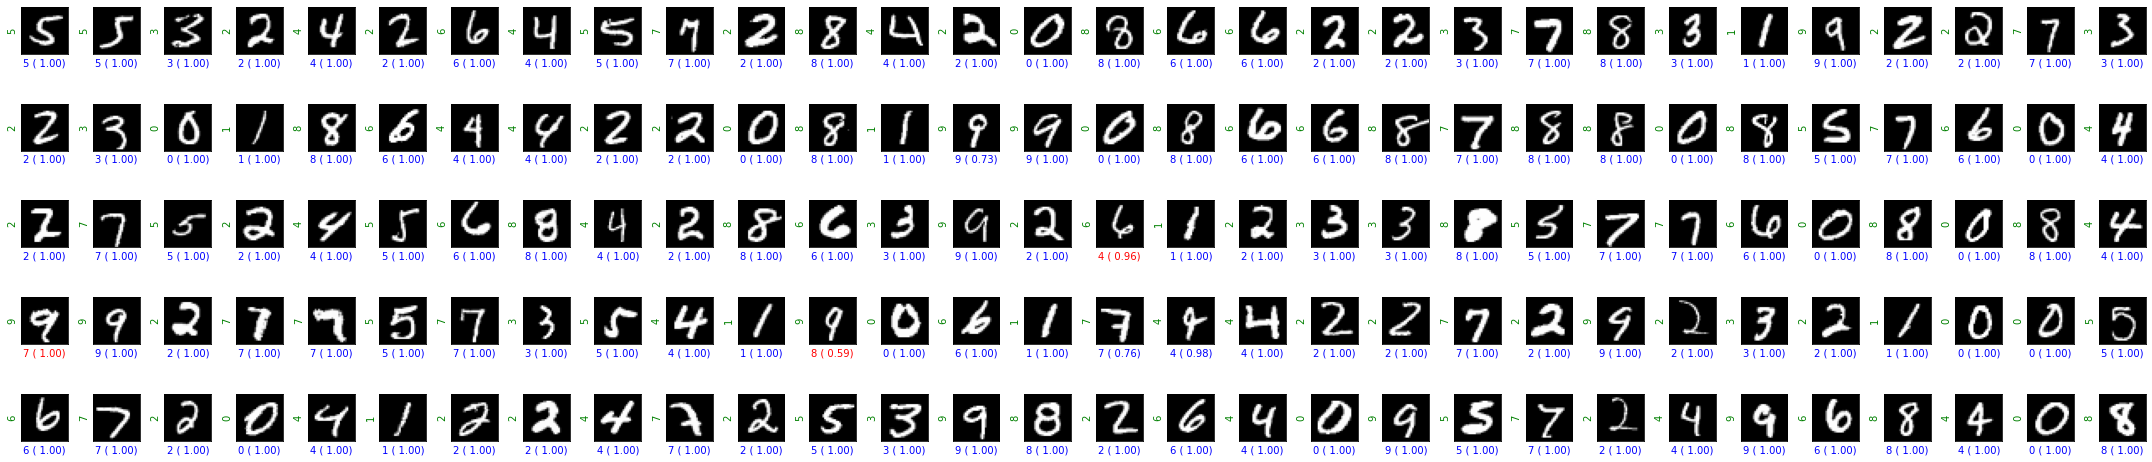

In [14]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [15]:
# Using 'SGD'

model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
# Normalize Data 

h3 = model.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2528 - accuracy: 0.9410 - val_loss: 0.0563 - val_accuracy: 0.9855
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.0468 - val_accuracy: 0.9872
Epoch 3/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.0432 - val_accuracy: 0.9878
Epoch 4/5
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0386 - val_accuracy: 0.9897


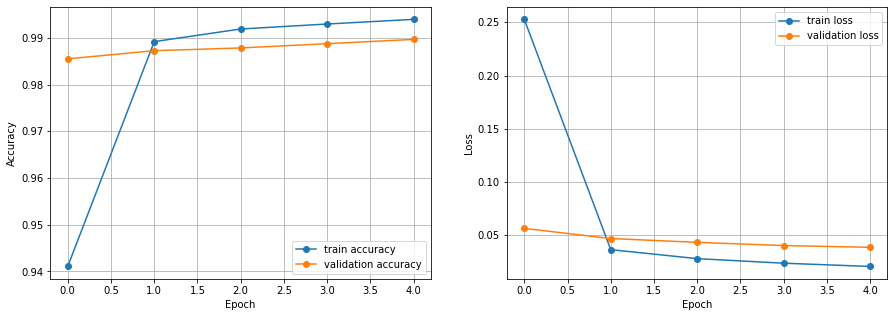

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
# Normalize Data

test_loss1, test_acc1 = model.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9897

Test Accuracy: 0.9897000193595886

Test Loss: 0.032414790242910385


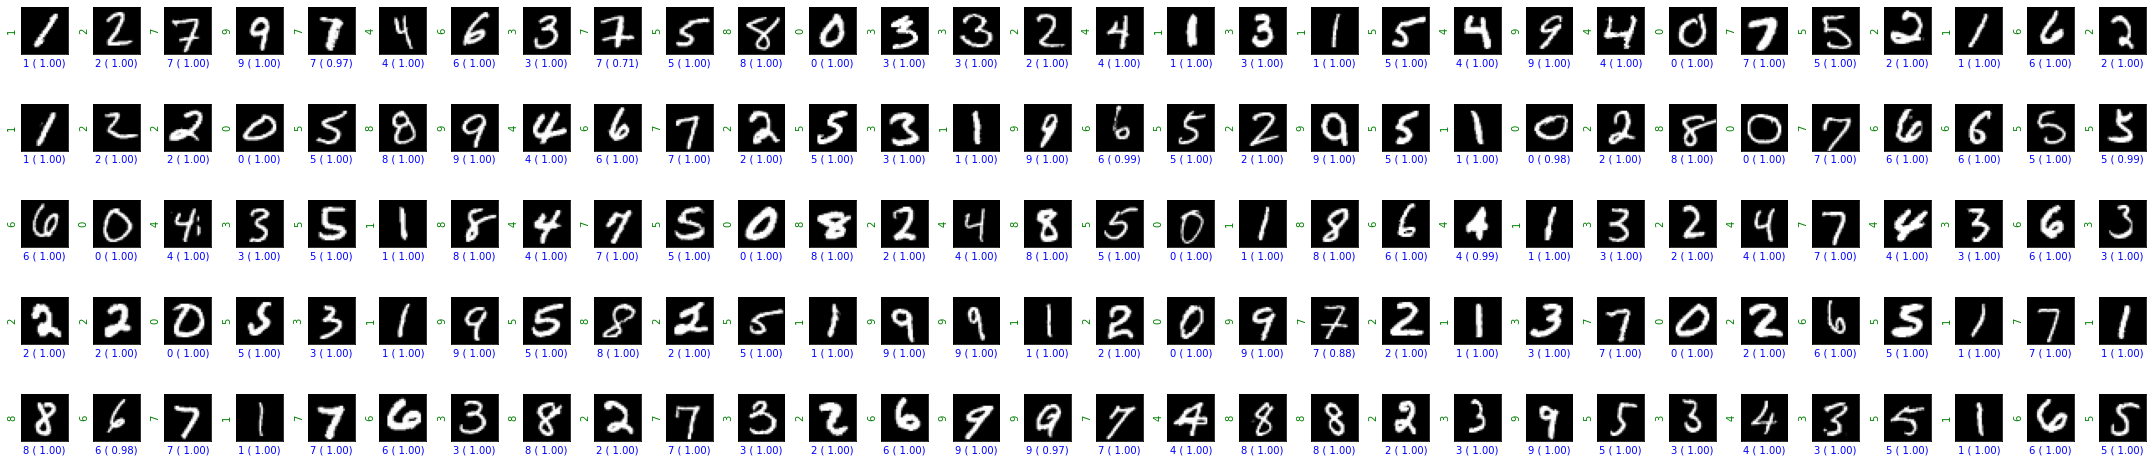

In [19]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [20]:
# Without Normalize Data

h4 = model.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.1007 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995


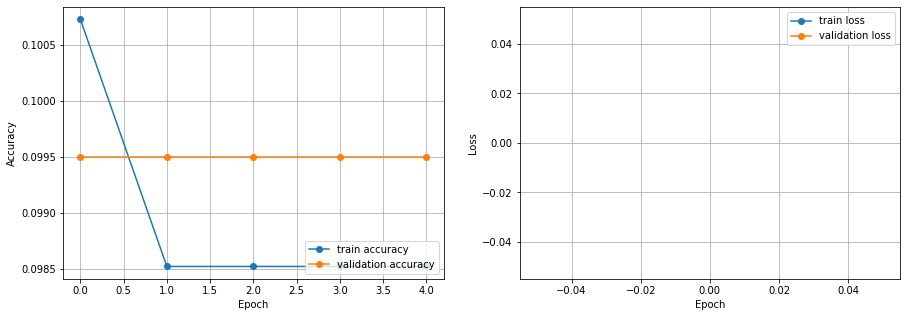

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
# Without Normalize Data

test_loss2, test_acc2 = model.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0980

Test Accuracy: 0.09799999743700027

Test Loss: nan


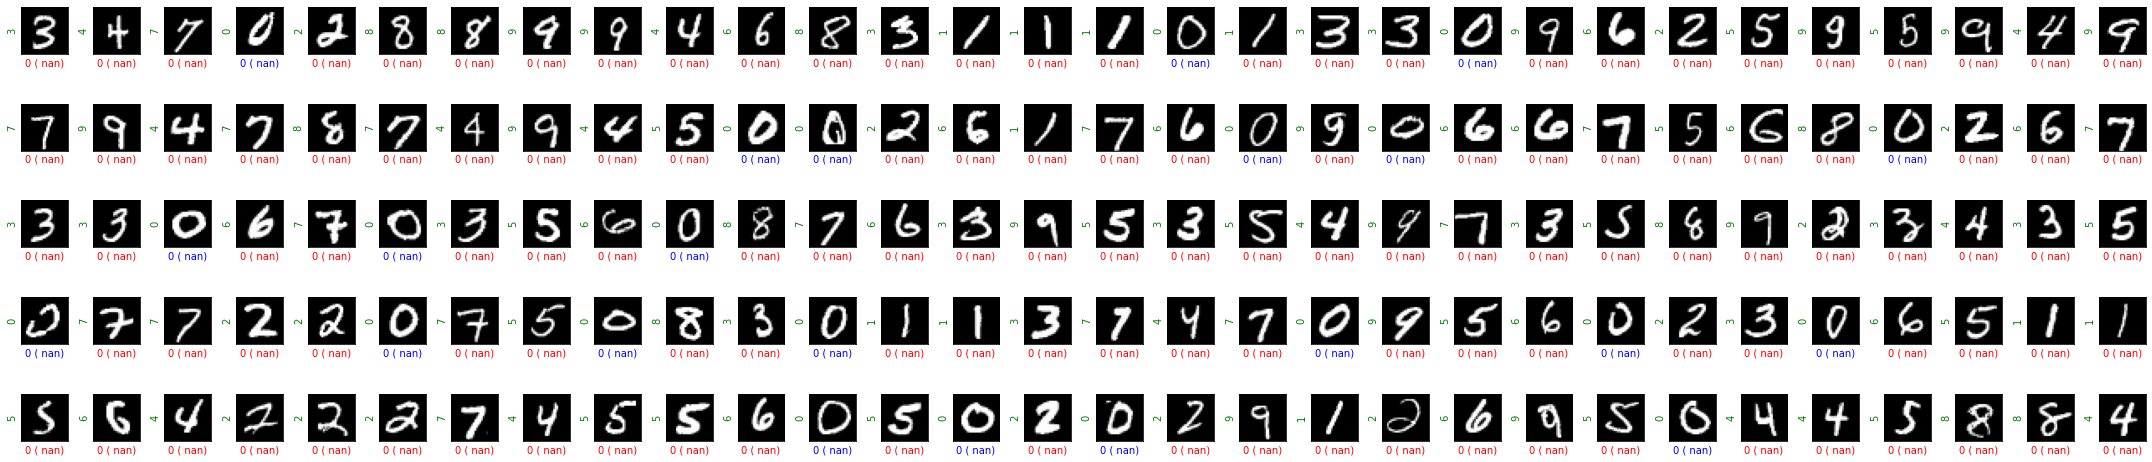

In [23]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [24]:
# Using 'RMSProp'

model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [25]:
# Normalize Data

h5 = model.fit(x=X_train1, y=Y_train1, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1200/1200 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
1200/1200 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995


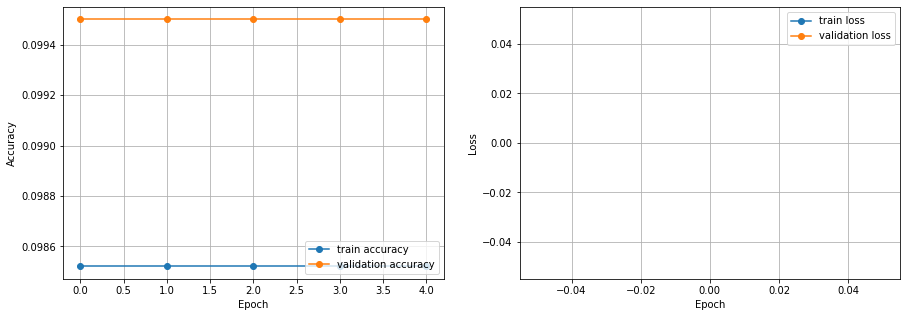

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [27]:
# Normalize Data

test_loss1, test_acc1 = model.evaluate(X_test1, Y_test1)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0980

Test Accuracy: 0.09799999743700027

Test Loss: nan


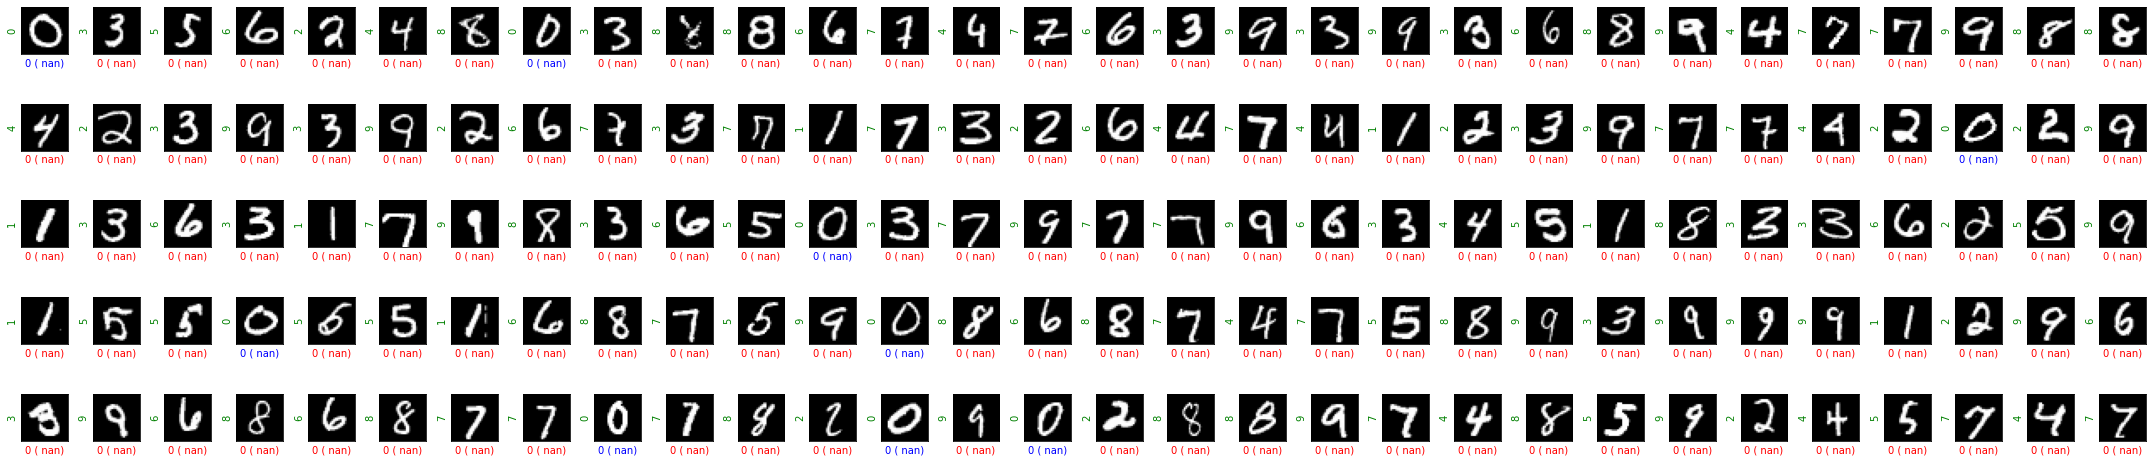

In [28]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test1.shape[0]), ROWS*COLS)
sample_images = X_test1[random_indices, :]
sample_labels = Y_test1[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [29]:
# Without Normalize Data

h6 = model.fit(x=X_train2, y=Y_train2, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995


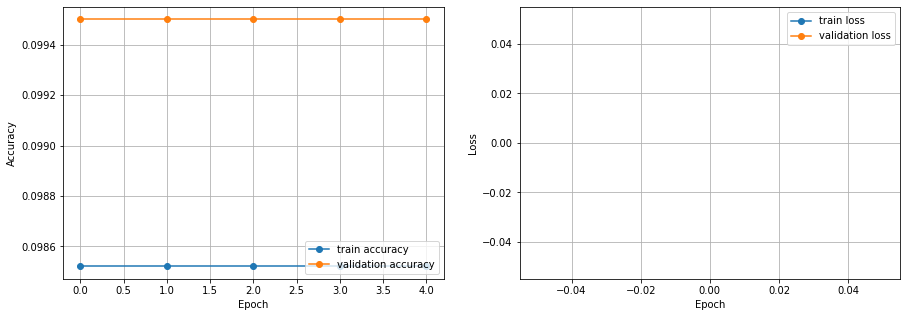

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [32]:
# Without Normalize Data

test_loss2, test_acc2 = model.evaluate(X_test2, Y_test2)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0980

Test Accuracy: 0.09799999743700027

Test Loss: nan


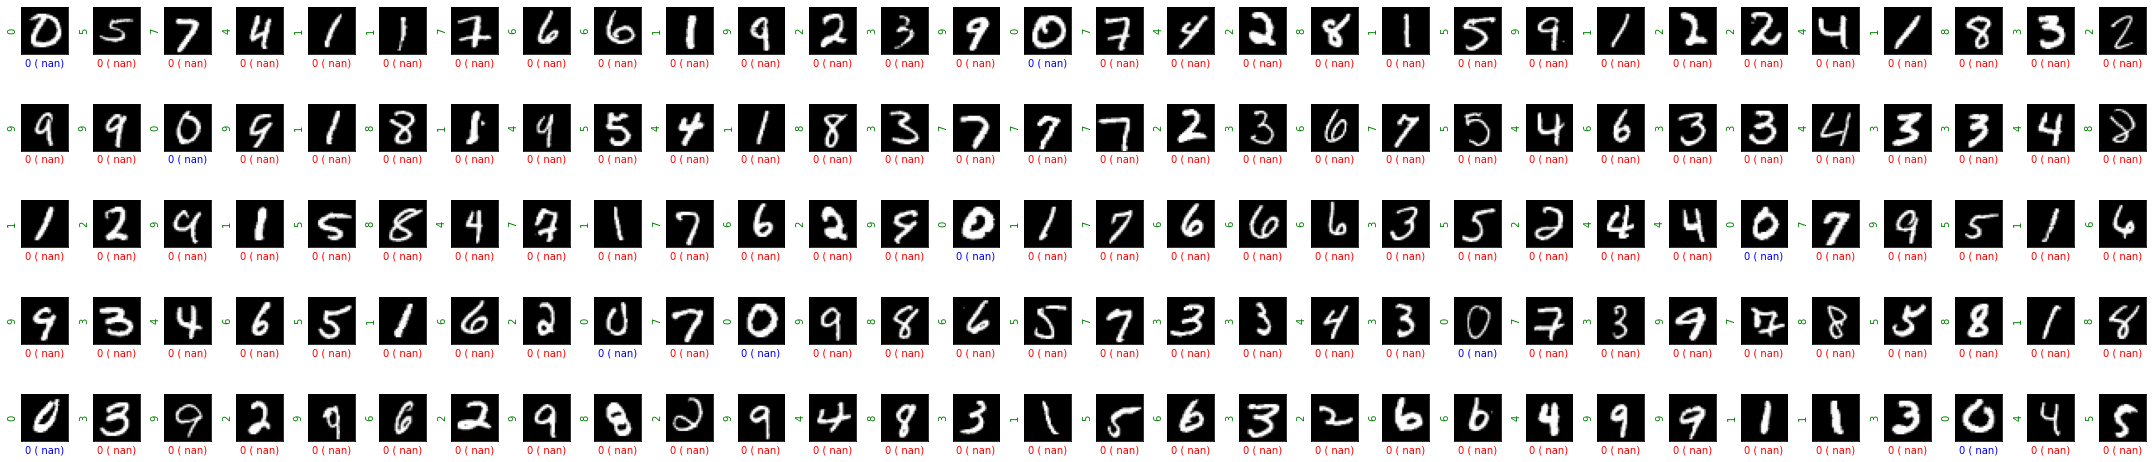

In [33]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test2.shape[0]), ROWS*COLS)
sample_images = X_test2[random_indices, :]
sample_labels = Y_test2[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

From the above analysis; we can say, the model performs better when we use optimizer "Adam" ( both for normalization and without normalization) but in case of SGD and RMSProp, the performance is not good. Though SGD perfoms good for normalize data but overall it is not good. May be there are some faults in code or some modifications needed to fix this problem. We have to try again for SGD and RMSProp to gain an expected result.